<a href="https://colab.research.google.com/github/jackiekuen2/notes-handson-ml-tf/blob/master/ch1_Regression_LifeSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [0]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [0]:
# Load the data
oecd_bli = pd.read_csv('oecd_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('weo_gpd_2015.xls', thousands=',', delimiter='\t', 
                             encoding='latin1', na_values="n/a")

In [0]:
print(oecd_bli.shape, gdp_per_capita.shape)

(2368, 17) (190, 6)


In [0]:
# Prepare the data
country = prepare_country_stats(oecd_bli, gdp_per_capita)

In [0]:
country.columns

Index(['GDP per capita', 'Life satisfaction'], dtype='object')

In [0]:
X = np.c_[country["GDP per capita"]]
y = np.c_[country["Life satisfaction"]]

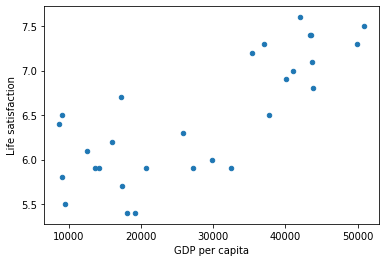

In [0]:
# Visualize the data
country.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [0]:
# Model: Linear Regression
lin_reg_model = LinearRegression()

# Train the model, fitting x and y
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lin_reg_model.coef_

array([[3.88236996e-05]])

In [0]:
# Make a prediction for Cyprus
X_new = [[22587]]

print(lin_reg_model.predict(X_new))

[[6.25984414]]


In [0]:
# Model 2: KNN Regresion
knn_model = KNeighborsRegressor()

knn_model.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [0]:
# Make a prediction for Cyprus
print(knn_model.predict(X_new))

[[5.78]]
